# Support Vector Machines

## Motivating Support Vector Machines
### Developing the Intuition

Support vector machines (SVM) are a powerful and flexible class of supervised algorithms. Developed in the 1990s, SVM have shown to perform well in a variety of settings which explains their popularity. Though the underlying mathematics can become somewhat complicated, the basic concept of a SVM is easily understood. Therefore, in what follows we develop an intuition, introduce the mathematical basics of SVM and ultimately look into how we can apply SVM with Python.

As an introductory example, borrowed from VanderPlas (2016), consider the following simplified two-dimensional classification task, where the two classes (indicated by the colors) are well separated. 

<img src="Graphics/0211_SVM_Intro1.png" alt="SVM_Intro1" style="width: 1000px;"/>

A linear discriminant classifier as discussed in chapter 8 would attempt to draw a separating hyperplane (which in two dimensions is nothing but a line) in order to distinguish the two classes. For two-dimensional data, we could even do this by hand. However, one problem arises: there are more than one separating hyperplane between the two classes.

<img src="Graphics/0211_SVM_Intro2.png" alt="SVM_Intro2" style="width: 1000px;"/>

There exist an infinite number of possible hyperplanes that perfectly discriminate between the two classes in the training data. In above figure we visualize but three of them. Depending on what hyperplane we choose, a new data point (e.g. the one marked by the red "X") will be assigned a different label. Yet, so far we have no decision criteria established to decide which one of the three hyperplanes we should choose. 

How do we decide which line best separates the two classes? The idea of SVM is to add a margin of some width to both sides of each hyperplane - up to the nearest point. This might look something like this:

<img src="Graphics/0211_SVM_Intro3.png" alt="SVM_Intro3" style="width: 1000px;"/>

In SVM, the hyperplane that maximizes the margin to the nearest points is the one that is chosen as decision boundary. In other words, the maximum margin estimator is what we are looking for. Below figure shows the optimal solution for a (linear) SVM. Of all possible hyperplanes, the solid line has the largest margins (dashed lines) - measured from the decision boundary (solid line) to the nearest points (circled points). 

<img src="Graphics/0211_SVM_Intro4.png" alt="SVM_Intro4" style="width: 1000px;"/>

### Support Vector

The three circled sample points in above figure represent the nearest points. All three lie along the (dashed) margin line and in terms of perpendicular distance are equidistant from the decision boundary (solid line). Together they form the so called **support vector**. The support vector "supports" the maximal margin hyperplane in the sense that if one of the observations were moved slightly, the maximal margin hyperplane would move as well. In other words, they dictate slope and intercept of  the hyperplane. Interestingly, any points further from the margin that are on the correct side do not modify the decision boundary. For example points at $(x_1, x_2) = (2.5, 1)$ or $(1, 4.2)$ have no effect on the decision boundary. Technically, this is because these points do not contribute to the loss function used to fit the model, so their position and number do not matter so long as they do not cross the margin (VanderPlas (2016)) . This is an important and helpful property as it simplifies calculations significantly. It is not surprising that computations are a lot faster if a model has only a few data points (in the support vector) to consider (James et al. (2013)). 

## Developing the Mathematical Intuition
### Hyperplanes

To start, let us do a brief (and superficial) refresher on hyperplanes. In a $p$-dimensional space, a hyperplane is a flat (affine) subspace of dimension $p - 1$. Affine simply indicates that the subspace need not pass through the origin. As we have seen above, in two dimensions a hyperplane is just a line. In three dimensions it is a plane. For $p > 3$ visualization is hardly possible but the notion applies in similar fashion. Mathematically a $p$-dimensional hyperplane is defined by the expression 

\begin{equation}
\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_p x_p = 0
\end{equation}


If a point $\mathbf{x}^* = (x^*_1, x^*_2, \ldots, x^*_p)^T$ (i.e. a vector of length $p$) satisfies the above equation, then $\mathbf{x}^*$ lies on the hyperplane. If $\mathbf{x}^{*}$ does not satisfy above equation but yields a value $>0$, that is

\begin{equation}
\beta_0 + \beta_1 x^*_1 + \beta_2 x^*_2 + \ldots + \beta_p x^*_p > 0
\end{equation}

then this tells us that $\mathbf{x}^*$ lies on one side of the hyperplane. Similarly, 

\begin{equation}
\beta_0 + \beta_1 x^*_1 + \beta_2 x^*_2 + \ldots + \beta_p x^*_p < 0
\end{equation}

tells us that $\mathbf{x}^*$ lies on the other side of the plane. 

### Separating Hyperplanes

Suppose our training sample is a $n \times p$ data matrix $\mathbf{X}$ that consists of $n$ observations in $p$-dimensional space, 

\begin{equation*}
\mathbf{x}_1 = 
\begin{pmatrix}
x_{11} \\
\vdots \\
x_{1p}
\end{pmatrix}, \; \ldots, \; \mathbf{x}_n = 
\begin{pmatrix}
x_{n1} \\
\vdots \\
x_{np}
\end{pmatrix}
\end{equation*}

and each observation falls into one of two classes: $y_1, \ldots, y_n \in \{-1, 1\}$. Then a separating hyperplane has the helpful property that

\begin{align}
f(x) = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \ldots + \beta_p x_{ip} \quad \text{is} \quad
\begin{cases}
> 0 & \quad \text{if } y_i =1 \\
< 0 & \quad \text{if } y_i = -1 
\end{cases}
\end{align}

Given such a hyperplane exists, it can be used to construct a very intuitive classifier: a test observation is assigned to a class based on the side of the hyperplane it lies. This means we simply calculate $f(x^*)$ and if the result is positive, we assign the test observation to class 1, and to class -1 otherwise.

### Maximal Margin Classifier

If our data can be perfectly separated, then - as alluded to above - there exist an infinite number of separating hyperplanes. Therefore we seek to maximize the margin to the closest training observations (support vector). The result is what we call the *maximal margin hyperplane*. 

Let us consider how such a maximal margin hyperplane is constructed. We follow Raschka (2015) in deriving the objective function as this approach is appealing to the intuition. For a mathematically more sound derivation, see e.g. Friedman et al. (2001, chapter 4.5). As before we assume to have a set of $n$ training observations $\mathbf{x}_1, \mathbf{x}_2, \ldots, \mathbf{x}_n \in \mathbb{R}^p$ with corresponding class labels $y_1, y_2, \ldots, y_n \in \{-1, 1\}$. The hyperplane as our decision boundary we have introduced above. Here is the same in vector notation, where $\mathbf{\beta}$ and $\mathbf{x}$ are vector of dimension $[p \times 1]$:

\begin{equation}
\beta_0 + \mathbf{\beta}^T \mathbf{x}_{\text{hyper}} = 0
\end{equation}

This way of writing is much more concise and therefore we will stick to it moving forward. Let us further define the positive and negative margin hyperplanes, which lie parallel to the decision boundary:
\begin{align}
\beta_0 + \mathbf{\beta}^T \mathbf{x}_{\text{pos}} &= 1 &\text{pos. margin} \\
\beta_0 + \mathbf{\beta}^T \mathbf{x}_{\text{neg}} &= -1 &\text{neg. margin}
\end{align}


Below you find a visual representationof the above. Notice that the two margin hyperplanes are parallel and the values for $\beta_0, \mathbf{\beta}$ are identical

<img src="Graphics/0211_SVM_Intro5.png" alt="SVM_Intro5" style="width: 1000px;"/>

If we subtract the equation for the negative margin from the positive, we get:

\begin{equation}
\mathbf{\beta}^T (\mathbf{x}_{\text{pos}} - \mathbf{x}_{\text{neg}}) = 2
\end{equation}

Let us normalize both sides of the equation by the length of the vector $\mathbf{\beta}$, that is the norm, which is defined as follows:

\begin{equation}
\Vert \mathbf{\beta} \Vert := \sqrt{\sum_{i=1}^p \beta_i^2} = 1
\end{equation}

With that we arrive at the following expression:

\begin{equation}
\frac{\mathbf{\beta}^T (\mathbf{x}_{\text{pos}} - \mathbf{x}_{\text{neg}})}{\Vert \mathbf{\beta}\Vert} = \frac{2}{\Vert \mathbf{\beta} \Vert}
\end{equation}

The left side of the equation can be interpreted as the normalized distance between the positive (upper) and negative (lower) margin. This distance we aim to maximize. Since maximizing the lefthand side of above expression is similar to maximizing the right hand side, we can summarize this in the following optimization problem:

\begin{equation}
\begin{aligned}
& \underset{\beta_0, \beta_1, \ldots, \beta_p}{\text{maximize}}
& & \frac{2}{\Vert \mathbf{\beta} \Vert} \\
& \text{subject to} & & \beta_0 + \mathbf{\beta}^T \mathbf{x}_{i} \geq \;\; 1 \quad \text{if } y_i = 1 \\
&&& \beta_0 + \mathbf{\beta}^T \mathbf{x}_{i} \leq -1 \quad \text{if } y_i = -1 \\
&&& \text{for } i = 1, \ldots, N.
\end{aligned}
\end{equation}

The two constraints make sure that all positive samples ($y_i = 1$) fall on or above the positive side of the positive margin hyperplane and all negative samples ($y_i = -1$) are on or below the negative margin hyperplane. A few tweaks allow us to write the two constraints as one. We show this by transforming the second constraint, in which case $y_i = -1$:

\begin{align}
   \beta_0 + \mathbf{\beta}^T \mathbf{x}_i &\leq -1 \\
   \Leftrightarrow \qquad y_i (\beta_0 + \mathbf{\beta}^T \mathbf{x}_i) &\geq (-1)y_i \\
   \Leftrightarrow \qquad y_i (\beta_0 + \mathbf{\beta}^T \mathbf{x}_i) &\geq 1
\end{align}

The same can be done for the first constraint - it will yield the same expression. Therefore, our maximization problem can be restated in a slightly simpler form:

\begin{equation}
\begin{aligned}
& \underset{\beta_0, \beta_1, \ldots, \beta_p}{\text{maximize}}
& & \frac{2}{\Vert \mathbf{\beta} \Vert} \\
& \text{subject to} & & y_i(\beta_0 + \mathbf{\beta}^T \mathbf{x}_{i}) \geq 1 \quad \text{for } i = 1, \ldots, N.
\end{aligned}
\end{equation}

This is a convex optimization problem (quadratic criterion with linear inequality constraints) and can be solved with Lagrange. For details refer to appendix (D1) of the script.

Note that in practice it is easier to minimize the reciprocal term of the squared norm of  $\mathbf{\beta}$, $\frac{1}{2} \Vert\mathbf{\beta} \Vert^2$. Therefore the objective function is often given as

\begin{equation}
\begin{aligned}
& \underset{\beta_0, \beta}{\text{minimize}}
& & \frac{1}{2}\Vert \mathbf{\beta} \Vert^2 \\
& \text{subject to} & & y_i(\beta_0 + \mathbf{\beta}^T \mathbf{x}_{i}) \geq 1 \quad \text{for } i = 1, \ldots, N.
\end{aligned}
\end{equation}

This transformation does not change the optimization problem yet at the same time is computationally easier to be handled by quadratic programming. A detailed discussion of quadratic programming goes beyond the scope of this course. For details, see e.g. Vapnik (2000) or [Burges (1998)](http://www.cmap.polytechnique.fr/~mallat/papiers/svmtutorial.pdf).

## Support Vector Classifier

### Non-Separable Data

Given our data is separable into two classes, the maximal margin classifier from before seems like a natural approach. However, it is easy to see that **when the data is not clearly discriminable, no separable hyperplane exists and therefore such a classifier does not exist**. In that case the above maximization problem has no solution. What makes the situation even more complicated is that the maximal margin classifier is very sensitive to changes in the support vectors. This means that this classifier might suffer from inappropriate sensitivity to individual observations and thus it has a substantial risk of overfitting the training data. That is why we might be willing to consider a classifier on a hyperplane that does not perfectly separate the two classes but allows for greater robustness to individual observations and better classification of most of the training observations. In other words it could be worthwhile to misclassify a few training observations in order to do a better job in classifying the test data (James et al. (2013)). 

### Details of the Support Vector Classifier

This is where the Support Vector Classifier (SVC) comes into play. It allows a certain number of observations to be on the 'wrong' side of the hyperplane while seeking a solution where the majority of data points are still on the 'correct' side of the hyperplane. The following figure visualizes this.

<img src="Graphics/0211_SVM_Intro6.png" alt="SVM_Intro6" style="width: 1000px;"/>

The SVC still classifies a test observation based on which side of a hyperplane it lies. However, when we train the model, the margins are now somewhat softened. This means that the model allows for a limited number of training observations to be on the wrong side of the margin and hyperplane, respectively. 

Let us briefly discuss in general terms how the support vector classifier reaches its optimal solution. For this we extend the optimization problem from the maximum margin classifier as follows: 

\begin{equation}
\begin{aligned}
& \underset{\beta_0, \beta}{\text{minimize}}
& & \frac{1}{2}\Vert \mathbf{\beta} \Vert^2 + C \left(\sum_{i=1}^n \epsilon_i \right) \\
& \text{subject to} & & \beta_0 + \mathbf{\beta}^T \mathbf{x}_{i} \geq (1-\epsilon_i) \quad \text{for } i = 1, \ldots, N. \\
& & & \epsilon_i \geq 0 \quad \forall i
\end{aligned}
\end{equation}

This, again, can be solved with Lagrange similar to the way it is shown for the maximum margin classifier (see appendix (D1)) and it is left to the reader as an exercise to derive the Lagrange (primal and dual) objective function. The impatient reader will find a solution draft in Friedman et al. (2001), section 12.2.1.

Let us now focus on the added term $C \left(\sum_{i=1}^n \epsilon_i \right)$.  Here, $\epsilon_1, \epsilon_2, \ldots, \epsilon_n$ are slack variables that allow the individual observations to be on the wrong side of the margin or the hyperplane. They contain information on where the $i$th observation is located, relative to the hyperplane and relative to the margin. 

* If $\epsilon_i = 0$ then the $i$th observation is on the correct side of the margin, 
* if $1 \geq \epsilon_i > 0$ it is on the wrong side of the margin but correct side of the hyperplane, and 
* if $\epsilon_i > 1$ it is on the wrong side of the hyperplane. 

The tuning parameter $C$ can be interpreted as a penalty factor for misclassification. It is defined by the user. Large values of $C$ correspond to a significant error penalty, whereas small values are used if we are less strict about misclassification errors. By controlling for $C$ we indirectly control for the margin and therefore actively tune the bias-variance trade-off. Decreasing the value of $C$ increases the bias but lowers the variance of the model. 

Below figure shows how $C$ impacts the decision boundary and its corresponding margin.

<img src="Graphics/0211_SVM_Intro7.png" alt="SVM_Intro7" style="width: 1000px;"/>

### Solving Nonlinear Problems

So far we worked with data that is linearly separable. What makes SVM so powerful and popular is that it can be kernelized to solve nonlinear classification problems. We start our discussion again with illustrations to build an intuition.

<img src="Graphics/0211_SVM_kernel1.png" alt="SVM_kernel1" style="width: 1000px;"/>

Clearly the data is not linear and the resulting (linear) decision boundary is useless. How, then, do we deal with this? With mapping functions. The basic idea is to project the data via some mapping function $\phi$ onto a higher dimension such that a linear separator would be sufficient. The idea is similar to using quadratic and cubic terms of the predictor in linear regression in order to address non-linearity $(y = \beta_0 + \beta_1 x_i + \beta_2 x_i^2 + \beta_3 x_i^3 + \ldots)$ . For example, for the data in the preceding figure we could use the following mapping function $\phi: \mathbb{R}^2 \rightarrow \mathbb{R}^3$.

\begin{equation}
\phi(x_1, x_2) = (z_1, z_2, z_3) = \left(x_1, x_2, x_1^2 + x_2^2 \right)
\end{equation}

<img src="Graphics/0211_SVM_kernel2.png" alt="SVM_kernel2" style="width: 1000px;"/>

Here we enlarge our feature space from $\mathbb{R}^2 \rightarrow \mathbb{R}^3$ in oder to accommodate a non-linear boundary. The transformed data becomes trivially linearly separable. All we have to do is find a plane in $\mathbb{R}^3$. If we project this decision boundary back onto the original feature space $\mathbb{R}^2$ (with $\phi^{-1}$), we have a nonlinear decision boundary. 

<img src="Graphics/0211_SVM_kernel3.png" alt="SVM_kernel3" style="width: 1000px;"/>

Here's an animated visualization of this concept.

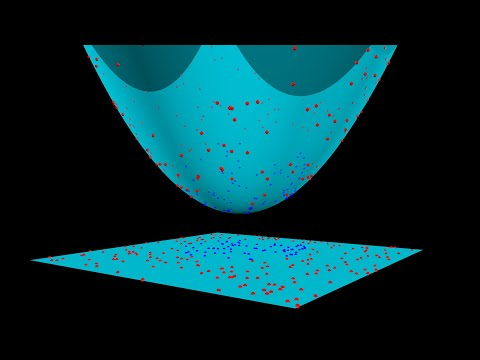

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('3liCbRZPrZA')

### The Problem with Mapping Functions
One could think that this is the recipe to work with nonlinear data: Transform all training data onto a higher-dimensional feature space via some mapping function $\phi$ train a linear SVM model and use the same function $\phi$ to transform new (test) data to classify it. 

As attractive as this idea seems, it is unfortunately unfeasible because it quickly becomes computationally too expensive. Here is a hands-on example why: Consider for example a degree-2 polynomial (kernel) transformation of the form $\phi(x_1, x_2) = (x_1^2, x_2^2, \sqrt{2} x_1 x_2, \sqrt{2c} x_1, \sqrt{2c} x_2, c)$. This means that for a dataset in $\mathbb{R}^2$ the transformation adds four additional dimensions ($\mathbb{R}^2 \rightarrow \mathbb{R}^6$). If we generalize this, it means that a $d$-dimensional polynomial (Kernel) transformation maps from $\mathbb{R}^p$ to an ${p + d}\choose{d}$-dimensional space [(Balcan (2011))](http://www.cs.cmu.edu/%7Eninamf/ML11/lect1020.pdf). Thus for datasets with $p$ large, naively performing such transformations will force most computers to its knees. 

### The Kernel Trick

Thankfully, not all is lost. It turns out that one does not need to explicitly work in the higher-dimensional space. One can show that when using Lagrange to solve our optimization problem, the training samples are only used to compute the pair-wise dot products $\langle x_i, x_{j}\rangle$ (where $x_i, x_{j} \in \mathbb{R}^{p}$). This is significant because there exist functions that, given two vectors $x_i$ and $x_{j}$ in $\mathbb{R}^p$, implicitly compute the dot product between the two vectors in a higher-dimension $\mathbb{R}^q$ (with $q > p$) without explicitly transforming $x_i, x_{j}$ onto a higher dimension $\mathbb{R}^q$. Such functions are called **Kernel** functions, written $K(x_i, x_{j})$ [(Kim (2013))](http://www.eric-kim.net/eric-kim-net/posts/1/kernel_trick_blog_ekim_12_20_2017.pdf). 

Let us show an example of such a Kernel function (following [Hofmann (2006)](http://www.cogsys.wiai.uni-bamberg.de/teaching/ss06/hs_svm/slides/SVM_Seminarbericht_Hofmann.pdf)). For ease of reading we use $x = (x_1, x_2)$ and $z=(z_1, z_2)$ instead of $x_i$ and $x_{j}$. Consider the Kernel function $K(x, z) = (x^T z)^2$ and the mapping function $\phi(x) = (x_1^2, \sqrt{2}x_1 x_2, x_2^2)$. If we were to solve our optimization problem from above with Lagrange, the mapping function appears in the form $\phi(x)^T \phi(z)$.

\begin{align}
\phi(x)^T \phi(z) &= (x_1^2, \sqrt{2}x_1 x_2, x_2^2)^T (z_1^2, \sqrt{2}z_1 z_2, z_2^2) \\
  &= x_1^2 z_1^2 + 2x_1 z_1 x_2 z_2 + x_2^2 z_2^2 \\
  &= (x_1 z_1 + x_2 z_2)^2 \\
  &= (x^T z)^2 \\
  &= K(x, z)
\end{align}

The mapping function would have transformed the data from $\mathbb{R}^2 \rightarrow \mathbb{R}^3$ and back. The Kernel function, however, stays in $\mathbb{R}^2$. This is of course only one (toy) example and far away from a proper proof but it provides the intuition of what can be generalized: that by using a Kernel function, e.g. where $K(x_i, x_j) = (x^T z)^2 = \phi(x_i)^T \phi(x_j)$, we implicitly transform our data to a higher-dimension without having to explicitly apply a mapping function $\phi$. This so called "Kernel Trick" allows us to efficiently learn nonlinear decision boundaries for SVM. 

### Popular Kernel Functions
Not every random mapping function is also a Kernel function. For a function to be a Kernel function, it needs to have certain properties (see e.g. [Balcan (2011)](http://www.cogsys.wiai.uni-bamberg.de/teaching/ss06/hs_svm/slides/SVM_Seminarbericht_Hofmann.pdf) or [Hofmann (2006)](http://www.cogsys.wiai.uni-bamberg.de/teaching/ss06/hs_svm/slides/SVM_Seminarbericht_Hofmann.pdf) for a discussion). In SVM literature, the following three Kernel functions have emerged as popular choices (Friedman et al. (2001)):

\begin{align}
d\text{th-Degree polynomial} \qquad K(x_i, x_j) &= (r + \gamma \langle x_i, x_j \rangle)^d \\
\text{Radial Basis (RBF)} \qquad K(x_i, x_j) &= \exp(-\gamma \Vert x_i - x_j \Vert^2) \\
\text{Sigmoid} \qquad K(x_i, x_j) &= \tanh(\gamma \langle x_i, x_j \rangle + r)
\end{align}

In general there is no "best choice". With each Kernel having some degree of variability, one has to find the optimal solution by experimenting with different Kernels and playing with their parameter ($\gamma, r, d$). 

### Optimization with Lagrange

We have mentioned before that the optimization problem of the maximum margin classifier and support vector classifier can be solved with Lagrange. The details of which are beyond the scope of this notebook. However, the interested reader is encouraged to learn the details in the appendix of the script (and the recommended reference sources) as these are crucial in understanding the mathematics/core of SVM and the application of Kernel functions.

## SVM with Scikit-Learn
### Preparing the Data

Having build an intuition of how SVM work, let us now see this algorithm applied in Python. We will again use the Scikit-learn package that has an optimized class implemented. The data we will work with is called "Polish Companies Bankruptcy Data Set" and was used in Zieba et al. (2014). The full set comprises of five data files. Each file contains 64 features plus a class label. The features are ratios derived from the financial statements of the more than 10'000 manufacturing companies considered during the period of 2000 - 2013 (from EBITDA margin to equity ratio to liquidity ratios (quick ratio) etc.. The five files differ in that the first contains data with companies that defaulted/were still running **five** years down the road ('1year.csv'), the second **four** years down the road ('2year.csv') etc. Details can be found in the original publication (Zikeba et al. (2016)) or in the [description provided on the UCI Machine Learning Repository site](https://archive.ics.uci.edu/ml/datasets/Polish+companies+bankruptcy+data) where the data was downloaded from. For our purposes we will use the '5year.csv' file where we should predict defaults within the next year. 

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.rcParams['font.size'] = 14

In [3]:
# Load data
df = pd.read_csv('Data/5year.csv', sep=',')
df.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.088238,0.55472,0.01134,1.0205,-66.5200,0.342040,0.109490,0.57752,1.0881,0.32036,...,0.080955,0.275430,0.91905,0.002024,7.2711,4.7343,142.760,2.5568,3.2597,0
1,-0.006202,0.48465,0.23298,1.5998,6.1825,0.000000,-0.006202,1.06340,1.2757,0.51535,...,-0.028591,-0.012035,1.00470,0.152220,6.0911,3.2749,111.140,3.2841,3.3700,0
2,0.130240,0.22142,0.57751,3.6082,120.0400,0.187640,0.162120,3.05900,1.1415,0.67731,...,0.123960,0.192290,0.87604,0.000000,8.7934,2.9870,71.531,5.1027,5.6188,0
3,-0.089951,0.88700,0.26927,1.5222,-55.9920,-0.073957,-0.089951,0.12740,1.2754,0.11300,...,0.418840,-0.796020,0.59074,2.878700,7.6524,3.3302,147.560,2.4735,5.9299,0
4,0.048179,0.55041,0.10765,1.2437,-22.9590,0.000000,0.059280,0.81682,1.5150,0.44959,...,0.240400,0.107160,0.77048,0.139380,10.1180,4.0950,106.430,3.4294,3.3622,0


In [4]:
# Check for NA values
df.isnull().sum()

Attr1       3
Attr2       3
Attr3       3
Attr4      21
Attr5      11
         ... 
Attr61     15
Attr62      0
Attr63     21
Attr64    107
class       0
Length: 65, dtype: int64

In [5]:
# Calculate % of missing values for 'Attr37'
df['Attr37'].isnull().sum()  / (len(df))

0.4311336717428088

Attribute 37 sticks out with 2'548 of 5'910 (43.1%) missing values. This attribute considers "(current assets - inventories) / long-term liabilities". Due to the many missing values we can not use a fill method so let us drop this feature column. 

In [6]:
# Drop column with 'Attr37'. 
# Notice that as of Pandas version 0.21.0 you can simply use df.drop(columns=['Attr37'])
df = df.drop('Attr37', axis=1)
df.iloc[:, 30:38].head()

,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr38,Attr39
0,0.077287,155.330,2.3498,0.24377,0.135230,1.4493,0.32101,0.095457
1,0.000778,108.050,3.3779,2.70750,-0.036475,1.2757,0.59380,-0.028591
2,0.143490,81.653,4.4701,0.65878,0.145860,1.1698,0.67731,0.129100
3,-0.138650,253.910,1.4375,0.83567,0.014027,1.2754,0.43830,0.010998
4,0.039129,140.120,2.6583,2.13360,0.364200,1.5150,0.51225,0.240400


As for the other missing values we are left to decide whether we want to remove the corresponding observations (rows) or apply a filling method. The problem with dropping all rows with missing values is that we might lose a lot of valuable information. Therefore in this case we prefer to use a common interpolation technique and impute `NaN` values with the corresponging feature mean. Alternatively we could use '`median`' or '`most_frequent`' as strategy. A convenient way to achieve this imputation is to use the `Imputer` class from `sklearn`.

Notice that as of `sklearn` version 0.20.2 Scikit-learn has [relabeled function `Imputer` to `SimpleImputer()`](https://scikit-learn.org/stable/modules/impute.html). Furthermore, with version 0.22.1 other imputers were introduced, such as a `KNNImputer` or a `IterativeImputer`. It is up to the reader to familiarize her-/himself with the available options for imputing. [See Scikit-learn's guide for details](https://scikit-learn.org/stable/modules/impute.html). To check for the Sklearn version you currently run hit `!pip list` in your shell.  

In [7]:
from sklearn.impute import SimpleImputer

# Impute missing values by mean (axis=0 --> along columns; 
# Notice that argument 'axis=' has been removed as of version 0.20.2)
ipr = SimpleImputer(missing_values=np.nan, strategy='mean')
ipr = ipr.fit(df.values)
imputed_data = ipr.transform(df.values)

# Assign imputed values to 'df' and check for 'NaN' values
df = pd.DataFrame(imputed_data, columns=df.columns)
df.isnull().sum().sum()

0

Now let us check if we have some categorical features that we need to transform. For this we compare the number of cells in the dataframe with the sum of numeric values (`np.isreal()`). If the result is 0, we do not need to apply a One-Hot-Encoding or LabelEncoding procedure. 

In [8]:
df.shape[0] * df.shape[1] - df.applymap(np.isreal).sum().sum()

0

As we see, the dataframe only consists of real values. Therefore, we can proceed by assigning columns 1-63 to variable `X` and column 64 to `y`.

In [9]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

### Applying SVM

Having assigned the data to `X` and `y` we are now ready to divide the dataset into separate training and test sets.

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    stratify=y)

Unlike e.g. decision tree algorithms SVM are sensitive to the magnitude of the data. Therefore scaling our data is recommended. 

In [11]:
from sklearn.preprocessing import StandardScaler

# Create StandardScaler object
sc = StandardScaler()

# Standardize features; equal results as if done in two
# separate steps (first .fit() and then .transform())
X_train_std = sc.fit_transform(X_train)

# Transform test set
X_test_std = sc.transform(X_test)

With the data standardized, we can finally apply a SVM on the data. We import the `SVC` (for Support Vector Classifier) from the Scikit-learn toolbox and create a `svm_linear` object that represents a linear SVM with `C=1`. Recall that `C` helps us control the penalty for misclassification. Large values of `C` correspond to large error penalties and vice-versa. More parameter can be specified. Details are best explained in the function's [documentation page](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

In [12]:
from sklearn.svm import SVC
from sklearn import metrics
import matplotlib.pyplot as plt

# Create object
svm_linear = SVC(kernel='linear', C=1.0)
svm_linear

SVC(kernel='linear')

With the `svm_linear` object ready we can now fit the object to the training data and check for the model's accuracy.

In [13]:
# Fit linear SVM to standardized training set
svm_linear.fit(X_train_std, y_train)

# Print results
print("Observed probability of non-default: {:.2f}".format(np.count_nonzero(y_train==0) / len(y_train)))
print("Train score: {:.2f}".format(svm_linear.score(X_train_std, y_train)))
print("Test score:  {:.2f}".format(svm_linear.score(X_test_std, y_test)))

Observed probability of non-default: 0.93
Train score: 0.93
Test score:  0.93


In [14]:
# Predict classes
y_pred = svm_linear.predict(X_test_std)

# Manual confusion matrix as pandas DataFrame
confm = pd.DataFrame({'Predicted': y_pred,
                      'True': y_test})
confm.replace(to_replace={0:'Non-Default', 1:'Default'}, inplace=True)
print(confm.groupby(['True','Predicted'], sort=False).size().unstack('Predicted'))

Predicted    Non-Default  Default
True                             
Non-Default       1096.0      4.0
Default             82.0      NaN


In the same way we can run a Kernel SVM on the data. We have four Kernel options: one linear as introduced above and three non-linear. All of them have hyperparameter available. If these are not specified, default values are taken. [Check the documentation for details](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

* `linear`: linear SVM as shown above with `C` as hyperparameter
* `rbf`: Radial basis function Kernel with `C, gamma` as hyperparameter
* `poly`: Polynomial Kernel with `C, degree, gamma, coef0` as hyperparameter
* `sigmoid`: Sigmoid Kernel with `C, gamma, coef0` as hyperparameter

Let us apply a polynomial Kernel as example.

In [15]:
svm_poly = SVC(kernel='poly', random_state=1)
svm_poly

SVC(kernel='poly', random_state=1)

Not having specified hyperparameter `C, degree, gamma`, and `coef0` the algorithm has taken default values. For `C` it is equal to 1, default `degree` is 3, `gamma=auto` means that the value will be calculated as $1/n_{\text{features}}$, and `coef0` is set to 0 as default. 

In [16]:
# Fit polynomial SVM to standardized training set
svm_poly.fit(X_train_std, y_train)

# Print results
print("Observed probability of non-default: {:.2f}".format(np.count_nonzero(y_train==0) / len(y_train)))
print("Train score: {:.2f}".format(svm_poly.score(X_train_std, y_train)))
print("Test score:  {:.2f}".format(svm_poly.score(X_test_std, y_test)))

Observed probability of non-default: 0.93
Train score: 0.94
Test score:  0.93


In [17]:
# Predict classes
y_pred = svm_poly.predict(X_test_std)

# Manual confusion matrix as pandas DataFrame
confm = pd.DataFrame({'Predicted': y_pred,
                      'True': y_test})
confm.replace(to_replace={0:'Non-Default', 1:'Default'}, inplace=True)
print(confm.groupby(['True','Predicted'], sort=False).size().unstack('Predicted'))

Predicted    Non-Default  Default
True                             
Non-Default         1096        4
Default               81        1


As it looks linear and polynomial SVM yield similar results. What is clearly unsatisfactory is the number of true defaults that the SVM missed to detect. Both linear as well as non linear SVM miss to label $\geq$ 80 defaults [sic]. From a financial perspective, this is unacceptable and raises questions regarding
* Class imbalance
* Hyperparameter fine-tuning through cross validation and grid search
* Feature selection
* Noise & dimension reduction

which we want to address in the next section.

## Dealing with Class Imbalance

When we deal with default data sets we observe that the ratio of non-default to default records is heavily skewed towards non-default. This is a common problem in real-world data set: Samples from one class or multiple classes dominate the data set. For the present data set we are talking 93% non-defaults vs. 7% defaults. Having an algorithm that predicts non-default 100 out of a 100 times is right in 93% of the cases. Therefore, training a model on such a data set that achieves the same 93% test accuracy (as our SVM above) means nothing else than our model hasn't learned anything informative from the features provided in this data set. Thus, when assessing a classifier on an imbalanced data set we have learned that other metrics such as precision, recall, ROC curve etc. might be more informative. 

Having said that, what we have to consider is that a class imbalance might influences a learning algorithm during the model fitting itself. Machine learning algorithms typically optimize a reward or cost function. This means that an algorithm implicitly learns the model that optimizes the predictions based on the most abundant class in the dataset in order to minimize the cost or maximize the reward during the training phase. And this in turn might yield skewed results in case of imbalanced data sets.

There are several options to deal with class imbalance, we will discuss two of them. The first option is to set the `class_weight` parameter to `class_weight='balanced'`. Most classifier have this option implemented (of the introduced classifiers, KNN, LDA and QDA lack such a parameter). **This will assign a larger penalty to wrong predictions on the minority class.**

In [18]:
# Initiate and fit a polynomial SVM to training set
svm_poly = SVC(kernel='poly', random_state=1, class_weight='balanced')
svm_poly.fit(X_train_std, y_train)

# Predict classes and print results
y_pred = svm_poly.predict(X_test_std)
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
print("Test score: {:.2f}".format(svm_poly.score(X_test_std, y_test)))

              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96      1100
         1.0       0.12      0.02      0.04        82

    accuracy                           0.92      1182
   macro avg       0.53      0.51      0.50      1182
weighted avg       0.88      0.92      0.89      1182

[[1086   14]
 [  80    2]]
Test score: 0.92


The second option we want to discuss is up- & downsampling of the minority/majority class. Both up- and downsampling are implemented in Scikit-learn through the `resample` function and depending on the data and given the task at hand, one might be better suited than the other. For the upsampling, scikit-learn will apply a bootstrapping to draw new samples from the datasets with replacement. This means that the function will repeatedly draw new samples from the minority class until it contains the number of samples we define. Here's a code example:

In [19]:
pd.DataFrame(X[y==1]).shape

(410, 63)

In [20]:
X[y==0].shape

(5500, 63)

In [21]:
from sklearn.utils import resample

# Upsampling: define which rows you want to upsample 
# (i.e. all columns of X where value in corresponding y vector is equal to 1: X[y==1], 
# and similar for y[y==1]. Then define how many samples should be generated through
# bootstrapping (here: X[y==0].shape[0] = 5'500))
X_upsampled, y_upsampled = resample(X[y==1], y[y==1],
                                    replace=True,
                                    n_samples=X[y==0].shape[0],
                                    random_state=1)
print('No. of default samples BEFORE upsampling:  {:.0f}'.format(y.sum()))
print('No. of default samples AFTER upsampling:  {:.0f}'.format(y_upsampled.sum()))

No. of default samples BEFORE upsampling:  410
No. of default samples AFTER upsampling:  5500


Downsampling works in similar fashion. 

In [22]:
# Downsampling
X_dnsampled, y_dnsampled = resample(X[y==0], y[y==0],
                                    replace=False,
                                    n_samples=X[y==1].shape[0],
                                    random_state=1)

Running the SVM algorighm on the balanced dataset works now as you would expect:

In [23]:
# Combine datasets
X_bal = np.vstack((X[y==1], X_dnsampled))
y_bal = np.hstack((y[y==1], y_dnsampled))

# Train test split
X_train_bal, X_test_bal, y_train_bal, y_test_bal = \
    train_test_split(X_bal, y_bal, 
                     test_size=0.2, 
                     random_state=0, 
                     stratify=y_bal)
    
# Standardize features; equal results as if done in two
# separate steps (first .fit() and then .transform())
X_train_bal_std = sc.fit_transform(X_train_bal)

# Transform test set
X_test_bal_std = sc.transform(X_test_bal)

# Initiate and fit a polynomial SVM to training set
svm_poly_bal = SVC(kernel='poly', random_state=1)
svm_poly_bal.fit(X_train_bal_std, y_train_bal)


# Predict classes and print results
y_pred_bal = svm_poly_bal.predict(X_test_bal_std)
print(metrics.classification_report(y_test_bal, y_pred_bal))
print(metrics.confusion_matrix(y_test_bal, y_pred_bal))
print("Test score: {:.2f}".format(svm_poly_bal.score(X_test_bal_std, y_test_bal)))

              precision    recall  f1-score   support

         0.0       0.51      1.00      0.68        82
         1.0       1.00      0.05      0.09        82

    accuracy                           0.52       164
   macro avg       0.76      0.52      0.39       164
weighted avg       0.76      0.52      0.39       164

[[82  0]
 [78  4]]
Test score: 0.52


By applying a SVM to a balanced set of data we improve our model slightly. Yet there remains some work to be done. The polynomial SVM still misses out on 95.1% (=78/82) of the default cases. 

It should be said that in general using an upsampled set is to be preferred over a downsampled set. However, here we are talking 11'000 observations times 63 features for the upsampled set and this can easily take quite some time to run models on, especially if we compute a grid search as in the next section. For this reason the downsampled set was used.

## Hyperparameter Fine-Tuning
### Pipelines

Another tool that is of help in optimizing our model is the `GridSearchCV` function introduced in the previous chapter that finds the best hyperparameter through a brute-force (cross validation) approach. Yet before we simply copy-past the code from the last chapter we ought to address a subtle yet important difference between the decision tree and SVM (or most other ML) algorithms that has implications on the application: Decision tree algorithms are of the few models where data scaling is not necessary. SVM on the other hand are (as most ML algorithms) fairly sensitive to the magnitude of the data. Now you might say that this is precisely why we standardized the data at the very beginning and with that we are good to go. In principle, this is correct. However, if we are precise, we commit a subtle yet possibly significant thought error. 

If we decide to apply a grid search using cross validation to find the optimal hyperparameter for e.g. a SVM we unfortunately can not just scale the full data set at the very beginning and then be good for the rest of the process. Conceptually it is important to understand why. Assume we have a data set. As we learned in the chapter on feature scaling and cross validation, applying a scaling on the combined data set and splitting the set into training and holdout set after the scaling is wrong. The reason is that information from the test set found its way into the model and distorts the results. The training set is scaled  not only based on information from that set but also based on information from the test set. 

Now the same is true if we apply a gridsearch process with cross validation on a training set. For each fold in the CV, some part of the training set will be declared as the training part, and some the test part. The test part within this split is used to measure the performance of our model trained on the training part. However, if we simply scale the training set and then apply gridsearch-CV on the scaled training set we would commit the same thought error as if we simply scale the full set at the very beginning. The test fold (of the CV split) would no longer be independent but implicitly already be part of the training set we used to fit the model. This is fundamentally different from how new data looks to the model. The test data within each cross validation split would no longer correctly mirrors how new data would look to the modeling process. Information already leaked from the test data into our modeling process. This would lead to overly optimistic results during cross validation, and possibly the selection of suboptimal parameter (Müller & Guido (2017)).

We have not addressed this problem in the chapter on cross validation because so far we have not introduced the tool to deal with it. Furthermore, if our data set is homogeneous and of some size, this is less of an issue. Yet as Scikit-learn provides a fantastic tool to deal with this (and many other) issue(s), we want to introduce it here. The tool is called **pipelines** and allows to combine multiple processing steps in a very convenient and proper way. Let us look at how we can use the `Pipeline` class to express the end-to-end workflow. First we build a pipeline object. This object is provided a list of steps. Each step is a tuple containing a name (you define) and an instance of an estimator. 

In [24]:
from sklearn.pipeline import Pipeline

# Create pipeline object with standard scaler and SVC estimator
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('svm_poly', SVC(kernel='poly', random_state=0))])

Next we define a parameter grid to search over and construct a `GridSearchCV` from the pipeline and the parameter grid. Notice that we have to specify for each parameter which step of the pipeline it belongs to. This is done by calling the name we gave this step, followed by a double underscore and the parameter name. For the present example, let us compare different degrees, and `C` values.

In [25]:
# Define parameter grid
param_grid = {'svm_poly__C': [0.1, 1, 10, 100],
              'svm_poly__degree': [1, 2, 3, 5, 7]}

With that we can run a `GridSearchCV` as usual.

In [26]:
from sklearn.model_selection import GridSearchCV

# Run grid search
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1)
grid.fit(X_train_bal, y_train_bal)

# Print results
print('Best CV accuracy: {:.2f}'.format(grid.best_score_))
print('Test score:       {:.2f}'.format(grid.score(X_test_bal, y_test_bal)))
print('Best parameters: {}'.format(grid.best_params_))

Best CV accuracy: 0.73
Test score:       0.78
Best parameters: {'svm_poly__C': 100, 'svm_poly__degree': 1}


Notice that thanks to the pipeline object, now for each split in the cross validation the `StandardScaler` is refit with only the training splits and no information is leaked from the test split into the parameter search. 

Depending on the grid you search, computations might take quite some time. One way to improve speed is by reducing the feature space; that is reducing the number of features. We will discuss feature selection and dimension reduction options in the next section but for the moment, let us just apply a method called Principal Component Analysis (PCA). PCA effectively transforms the feature space from $\mathbb{R}^{p} \rightarrow \mathbb{R}^{q}$ with $q$ being a user specified value (but usually $q < < p$). PCA is similar to other preprocessing steps and can be included in pipelines as e.g. `StandardScaler`. 

Here we reduce the feature space from $\mathbb{R}^{63}$ (i.e. $p=63$ features) to $\mathbb{R}^{2}$. This will make the fitting process faster. However, this comes at a cost: by reducing the feature space we might not only get rid of noise but also lose part of the information available in the full dataset. Our model accuracy might suffer as a consequence. Furthermore, the speed that we gain by fitting a model to a smaller subset can be set off by the additional computations it takes to calculate the PCA. In the example of the upsampled data set we would be talking of an $[11'000 \cdot 0.8 \cdot 0.8 \times 63]$ matrix (0.8 for the train/test-split and each cv fold) for which eigenvector and eigenvalues need to be calculated. This means up to 63 eigenvalues per grid search loop. 

In [27]:
from sklearn.decomposition import PCA

# Create pipeline object with standard scaler, PCA and SVC estimator
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('pca', PCA(n_components=2)),
                 ('svm_poly', SVC(kernel='poly', random_state=0))])

# Define parameter grid
param_grid = {'svm_poly__C': [100],
              'svm_poly__degree': [1, 2, 3]}

# Run grid search
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1)
grid.fit(X_train_bal, y_train_bal)

# Print results
print('Best CV accuracy: {:.2f}'.format(grid.best_score_))
print('Test score:       {:.2f}'.format(grid.score(X_test_bal, y_test_bal)))
print('Best parameters: {}'.format(grid.best_params_))

Best CV accuracy: 0.62
Test score:       0.76
Best parameters: {'svm_poly__C': 100, 'svm_poly__degree': 1}


Other so called preprocessing steps can be included in the pipeline too. This shows how seamless such workflows can be steered through pipelines. We can even combine multiple models as we show in the next code snippet. By now you are probably aware that trying all possible solutions is not a viable machine learning strategy. Computational power is certainly going to be an issue. Nevertheless, for the record we provide below an example where we apply logistic regression and a SVM with RBF kernel to find the best solution (details see section on PCA below). 

In [28]:
from sklearn.linear_model import LogisticRegression

# Create pipeline object with standard scaler, PCA and SVC estimator
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('classifier', SVC(random_state=0))])

# Define parameter grid
param_grid = [{'scaler': [StandardScaler()],
               'classifier': [SVC(kernel='rbf')],
               'classifier__gamma': [1, 10],
               'classifier__C': [10, 100]},
              {'scaler': [StandardScaler(), None],
               'classifier': [LogisticRegression(max_iter=1000)],
               'classifier__C': [10, 100]}]

# Run grid search
grid = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1)
grid.fit(X_train_bal, y_train_bal)

# Print results
print('Best CV accuracy: {:.2f}'.format(grid.best_score_))
print('Test score:       {:.2f}'.format(grid.score(X_test_bal, y_test_bal)))
print('Best parameters: {}'.format(grid.best_params_))

Best CV accuracy: 0.75
Test score:       0.76
Best parameters: {'classifier': SVC(C=100, gamma=1), 'classifier__C': 100, 'classifier__gamma': 1, 'scaler': StandardScaler()}


From the above output we see that the SVC yields the best accuracy.

## Feature Selection and Dimensionality Reduction
### Complexity and the Curse of Overfitting

If we observe that a model performs much better on training than on test data, we have an indication that the model suffers from overfitting. The reason for the overfitting is most probably that our model is too complex for the given training data. Common solutions to reduce the generalization error are (Raschka (2015)):
* Collect more (training) data
* Introduce a penalty for complexity via regularization
* Choose a simpler model with fewer parameter
* Reduce the dimensionality of the data

Collecting more data is self explanatory but often not applicable. Regularization via a complexity penalty term is a technique that is primarily applicable to regression settings (e.g. logistic regression). We will not discuss it here but the interested reader will easily find helpful information in e.g. James et al. (2013) chapter 6 or Raschka (2015) chapter 4. Here we will look at one commonly used solution to reduce overfitting: dimensionality reduction via feature selection. 


### Feature Selection

A useful approach to select relevant features from a data set is to use information from the random forest algorithm we introduced in the previous chapter. There we elaborated how decision trees rank the feature importance based on a impurity decrease. Conveniently, we can access this feature importance rank directly from the `RandomForestClassifier` object. By executing below code - following the example in Raschka (2015) - we will train a random forest model on the balanced default data set (from before) and rank the features by their respective importance measure.

In [29]:
from sklearn.ensemble import RandomForestClassifier

# Extract feature labels
feat_labels = df.columns[:-1]

# Create Random Forest object, fit data and
# extract feature importance attributes
forest = RandomForestClassifier(random_state=1)
forest.fit(X_train_bal, y_train_bal)
importances = forest.feature_importances_

In [30]:
# Sort output (by relative importance) and 
# print top 15 features
indices = np.argsort(importances)[::-1]
n = 15
for i in range(n):
    print('{0:2d}) {1:7s} {2:6.4f}'.format(i + 1, 
                                           feat_labels[indices[i]],
                                           importances[indices[i]]))

 1) Attr27  0.0531
 2) Attr26  0.0374
 3) Attr16  0.0369
 4) Attr21  0.0354
 5) Attr39  0.0339
 6) Attr13  0.0336
 7) Attr35  0.0313
 8) Attr29  0.0268
 9) Attr42  0.0261
10) Attr41  0.0238
11) Attr25  0.0227
12) Attr15  0.0220
13) Attr7   0.0219
14) Attr46  0.0209
15) Attr11  0.0207


The value in decimal is the relative importance for the respective feature. We can also plot this result to have a better overview. Below code shows one way of doing it.

In [31]:
# Get cumsum of the n most important features
feat_imp = np.sort(importances)[::-1]
sum_feat_imp = np.cumsum(feat_imp)[:n]

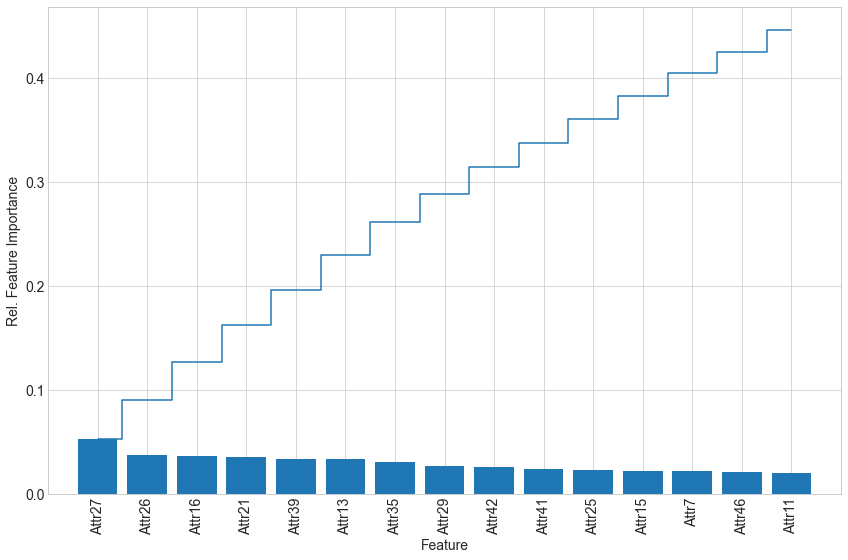

In [32]:
# Plot Feature Importance (both cumul., individual)
plt.figure(figsize=(12, 8))
plt.bar(range(n), importances[indices[:n]], align='center')
plt.xticks(range(n), feat_labels[indices[:n]], rotation=90)
plt.xlim([-1, n])
plt.xlabel('Feature')
plt.ylabel('Rel. Feature Importance')
plt.step(range(n), sum_feat_imp, where='mid', 
         label='Cumulative importance')
plt.tight_layout();

Executing the code will rank the different features according to their relative importance. The definition of each `AttrXX` we would have to [look up in the data description](https://archive.ics.uci.edu/ml/datasets/Polish+companies+bankruptcy+data). Note that the feature importance values are normalized such that they sum up to 1.

Feature selection in the way shown in the preceding code snippets will not work in combination with a `pipeline` object. However, Scikit-learn has implemented such a function that could be used in a preprocessing step. Its name is `SelectFromModel` and details can be found [here](http://scikit-learn.org/stable/modules/feature_selection.html#feature-selection-using-selectfrommodel). Instead of selecting the top $n$ features you define a threshold, which selects those features whose combined importance is greater or equal to said threshold (e.g. mean, median etc.). For reference, below it is shown how the function is applied inside a pipeline.

In [33]:
from sklearn.feature_selection import SelectFromModel

pipe = Pipeline([('feature_selection', SelectFromModel(RandomForestClassifier(), threshold='median')),
                 ('scaler', StandardScaler()),
                 ('classification', SVC())])
pipe.fit(X_train_bal, y_train_bal).score(X_test_bal, y_test_bal)

0.8048780487804879

### Principal Component Analysis

In the previous section you learned an approach for reducing the dimensionality of a data set through feature selection. An alternative to feature selection is feature extraction, of which Principal Component Analysis (PCA) is the best known and most popular approach. It is an unsupervised method that aims to summarize the information content of a data set by transforming it onto a new feature subspace of lower dimensionality than the original one. With the rise of big data, this is a field that is gaining importance by the day. PCA is widely used in a variety of field - e.g. in finance to de-noise signals in stock market trading, create factor models, for feature selection in bankruptcy prediction, dimensionality reduction of high frequency data etc.. Unfortunately, the scope of this course does not allow us to discuss PCA in great detail. Nevertheless the fundamentals shall be addressed here briefly so that the reader has a good understanding of how PCA helps in reducing dimensionality. 

To build an intuition for PCA we quote the excellent James et al. (2013, p. 375): "*PCA finds a low-dimensional representation of a dataset that contains as much as possible of the **variation**. The idea is that each of the $n$ observations lives in $p$-dimensional space, but not all of these dimensions are equally interesting. PCA seeks a small number of dimensions that are as interesting as possible, where the concept of interesting is measured by the amount that the observation vary along each dimension. Each of the dimensions found by PCA is a linear combination of the $p$ features.*" Since each principal component is required to be orthogonal to all other principal components, we basically take correlated original variables (features) and replace them with a small set of principal components that capture their joint variation. 

Below figures aim at visualizing the idea of principal components. In both figures we see the same two-dimensional dataset. PCA searches for the principal axis along which the data varies most. These principal axis measure the variance of the data when projected onto that axis. The two vectors (arrows) in the left plot visualize this. Notice that given an $[n \times p]$ feature matrix $\mathbf{X}$ there are at most $\min(n-1, p)$ principal components. The figure on the right-hand side displays the projection of the data points projected onto the first principal axis. In this way we have reduced the dimensionality from $\mathbf{R}^2$ to $\mathbf{R}^1$. In practice, PCA is of course primarily used for datasets with $p$ large and the selected number of principal components $q$ is usually much smaller than the dimension of the original dataset ($q << p)$.

<img src="Graphics/0211_PCA1.png" alt="PCA1" style="width: 1000px;"/>

The first principal component is the direction in space along which (orthogonal) projections have the largest variance. The second principal component is the direction which maximizes variance among all directions while being orthogonal to the first. The $k^{\text{th}}$ component is the variance-maximizing direction orthogonal to the previous $k-1$ components.  

How do we express this in mathematical terms? Let $\mathbf{X}$ be an $n \times p$ dataset and let it be centered (i.e. each column mean is zero; notice that standardization is very important in PCA). The $p \times p$ variance-covariance matrix $\mathbf{C}$ is then equal to $\mathbf{C} = \frac{1}{n} \mathbf{X}^T \mathbf{X}$. Additionally, let $\mathbf{\phi}$ be a unit $p$-dimensional vector, i.e. $\phi \in \mathbb{R}^p$ and let $\sum_{i=1}^p \phi_{i1}^2 = \mathbf{\phi}^T \mathbf{\phi} = 1$.

The projections of the individual data points onto the principal axis are given by the linear combination of the form 

\begin{equation}
Z_{i} = \phi_{1i} X_{1} + \phi_{2i} X_{2} + \ldots + \phi_{pi} X_{p}.
\end{equation}

In matrix notation we write

\begin{equation}
\mathbf{Z} = \mathbf{X \phi}
\end{equation}

Since each column vector $X_i$ is standardized, i.e. $\frac{1}{n} \sum_{i=1}^n x_{ip} = 0$, the average of $Z_i$ (the column vector for feature $i$) will be zero as well. With that, the variance of $\mathbf{Z}$ is 

\begin{align}
\text{Var}(\mathbf{Z}) &=  \frac{1}{n} (\mathbf{X \phi})^T (\mathbf{X \phi}) \\
  &= \frac{1}{n} \mathbf{\phi}^T \mathbf{X}^T \mathbf{X \phi} \\
  &= \mathbf{\phi}^T \frac{\mathbf{X}^T \mathbf{X}}{n} \mathbf{\phi} \\
  &= \mathbf{\phi}^T \mathbf{C} \mathbf{\phi}
\end{align}

Note that it is common standard to use the population estimation of variance (division by $n$) instead of the sample variance (division by $n-1$). 

Now, PCA seeks to solve a sequence of optimization problems:

\begin{equation}
\begin{aligned}
& \underset{\mathbf{\phi}}{\text{maximize}} & & \text{Var}(\mathbf{Z})\\
& \text{subject to} & & \mathbf{\phi}^T \mathbf{\phi}=1, \quad \phi \in \mathbb{R}^p \\
&&& \mathbf{Z}^T \mathbf{Z} = \mathbf{ZZ}^T = \mathbf{I}.
\end{aligned}
\end{equation}

Looking at the above term it should be clear why we haver restricted vector $\mathbf{\phi}$ to be a unit vector. If not, we could simply increase $\mathbf{\phi}$ - which is not what we want. This problem can be solved with Lagrange and via an eigen decomposition (a standard technique in linear algebra). The details of which are explained in the appendix of the script. 

How we apply PCA within a pipeline workflow we have shown above. A more general setup is shown in below code snippet. We again make use of the polish bankruptcy set introduced above.

In [34]:
from sklearn.decomposition import PCA

# Define no. of PC
q = 10

# Create PCA object and fit to find  
# first q principal components
pca = PCA(n_components=q)
pca.fit(X_train_bal)
pca

PCA(n_components=10)

To close, one last code snippet is provided. Running it will visualize the cumulative explained variance ratio as a function of the number of components. (Mathematically, the explained variance ratio is the ratio of the eigenvalue of principal component $i$ to the sum of the eigenvalues, $\frac{\lambda_i}{\sum_{i}^p \lambda_i}$. See the appendix in the script to better understand the meaning of eigenvalues in this context.) In practice, this might be helpful in deciding on the number of principal components $q$ to use.

In [35]:
# Run PCA for all possible PCs
pca = PCA().fit(X_train_bal)

# Define max no. of PC
q = X_train_bal.shape[1]

# Get cumsum of the PC 1-q
expl_var = pca.explained_variance_ratio_
sum_expl_var = np.cumsum(expl_var)[:q]

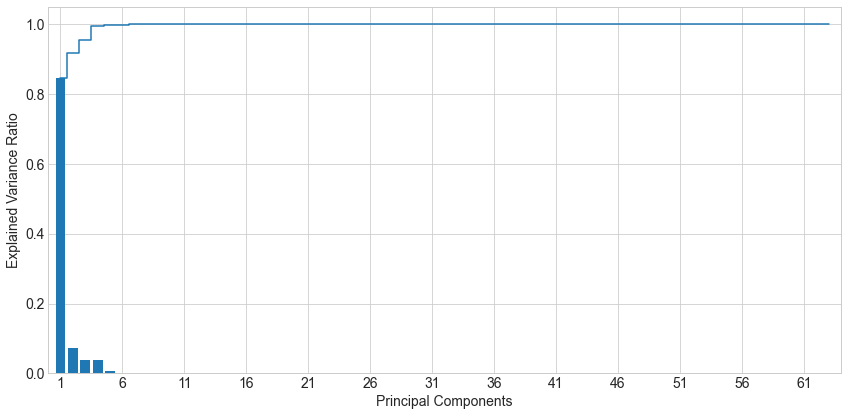

In [36]:
# Plot Feature Importance (both cumul., individual)
plt.figure(figsize=(12, 6))
plt.bar(range(1, q + 1), expl_var, align='center')
plt.xticks(range(1, q + 1, 5))
plt.xlim([0, q + 1])
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.step(range(1, 1 + q), sum_expl_var, where='mid')
plt.tight_layout();

This shows us that the first 5 principal components explain basically all variation in the data. Therefore we could focus to work with only these. 

# Further Ressources


In writing this notebook, many ressources were consulted. For internet ressources the links are provided within the textflow above and will therefore not be listed again. Beyond these links, the following ressources were consulted and are recommended as further reading on the discussed topics:

* Burges, Christopher J.C., 1998, A tutorial on support vector machines for pattern recognition, Data mining and knowledge discovery 2.2, 121-167.
* Friedman, Jerome, Trevor Hastie, and Robert Tibshirani, 2001, *The Elements of Statistical Learning* (Springer, New York, NY).
* James, Gareth, Daniela Witten, Trevor Hastie, and Robert Tibshirani, 2013, *An Introduction to Statistical Learning: With Applications in R* (Springer Science & Business Media, New York, NY).
* Müller, Andreas C., and Sarah Guido, 2017, *Introduction to Machine Learning with Python* (O’Reilly Media, Sebastopol, CA).
* Raschka, Sebastian, 2015, *Python Machine Learning* (Packt Publishing Ltd., Birmingham, UK).
* Shalizi, Cosma Rohilla, 2017, Advanced Data Analysis from an Elementary Point of View from website, http://www.stat.cmu.edu/~cshalizi/ADAfaEPoV/ADAfaEPoV.pdf, 08/24/17.
* VanderPlas, Jake, 2016, *Python Data Science Handbook* (O'Reilly Media, Sebastopol, CA).
* Vapnik, Vladimir N., 2013, *The Nature of Statistical Learning* (Springer, New York, NY).

